<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning/blob/master/IE406_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [81]:
digits = load_digits()
print(digits.images.shape, digits.target.shape)
X = digits.images
Y = digits.target
X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9)
print(X_train.shape, Y_train.shape)
num_classes = 10

(1797, 8, 8) (1797,)
(1797, 64) (1797,)
(1617, 64) (1617,)


In [0]:
def calculate_sw(X_train,Y_train,num_classes):
  within_class_scatter_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
  for i in num_classes:
    sw = X_train[Y_train==i] - np.mean(X_train[Y_train==i],axis=0)
    within_class_scatter_matrix += np.matmul(sw.T, sw)
  return within_class_scatter_matrix

def calculate_sb(X_train,Y_train,num_classes):
  between_class_scatter_matrix = np.zeros((X_train.shape[1],X_train.shape[1]))
  for i in num_classes:
    sb = np.mean(X_train[Y_train==i],axis=0) - np.mean(X,axis=0)
    sb = sb.reshape((X_train.shape[1],1))
    N = len(X_train[Y_train==i])
    between_class_scatter_matrix += N*np.dot(sb,sb.T)
  return between_class_scatter_matrix

def show_eigen_values(pairs,num_classes):
  print('Eigen values')
  for i, pair in enumerate(pairs):
      print('Eigenvalues {}: {}'.format(i+1, pair[0].real))
      if(i+1>=num_classes.shape[0]):
        break

def show_variance(pairs,num_classes):
  eigen_value_sums = np.sum(eigen_values)
  print('Explained Variance')
  for i, pair in enumerate(pairs):
      print('Eigenvector {}: {}'.format(i+1, (pair[0]*100/eigen_value_sums).real))
      if(num_classes.shape[0]>3):
        plt.scatter(i+1, (pair[0]*100/eigen_value_sums).real)
      if(i+1>=num_classes.shape[0]):
        break
  if(num_classes.shape[0]>3):
    plt.xlabel('Number of eigen vectors')
    plt.ylabel('Variance Contributed')
    plt.title('Number of eigen vectors v/s Variance Contributed')
    plt.show()

def show_graph(X_lda,y):
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  plt.title('Linear Discriminant Analysis along first two dimensions')
  plt.scatter(X_lda[:,0,0],X_lda[:,1,0],c=y)
  plt.show()

def LDA(X_train,Y_train,num_classes):
  sw = calculate_sw(X_train,Y_train,num_classes)
  sb = calculate_sb(X_train,Y_train,num_classes)
  eigen_values, eigen_vectors = np.linalg.eig(np.matmul(np.linalg.pinv(sw), sb))
  pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
  pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
  show_eigen_values(pairs,num_classes)
  show_variance(pairs,num_classes)
  w_matrix = np.zeros((num_classes.shape[0],X_train.shape[1],1))
  for i in range(num_classes.shape[0]):
    w_matrix[i] = pairs[i][1].reshape(X_train.shape[1], 1)
  print("Weight matrix dimension : " , w_matrix.shape)
  X_lda = np.array(X_train.dot(w_matrix))
  print("LDA Dimensions : ", X_lda.shape)
  le = LabelEncoder()
  y = le.fit_transform(Y_train)
  show_graph(X_lda,y)

Eigen values
Eigenvalues 1: 7.849015283790662
Eigenvalues 2: 4.914811609961554
Eigenvalues 3: 4.460749632730307
Eigenvalues 4: 3.2071234053752065
Eigenvalues 5: 2.2077629840601274
Eigenvalues 6: 1.786944804242902
Eigenvalues 7: 1.1365583657025176
Eigenvalues 8: 0.7901510886530985
Eigenvalues 9: 0.537304584549444
Eigenvalues 10: 0.003129527828197578
Explained Variance
Eigenvector 1: 29.888105822111687
Eigenvector 2: 18.715011269965547
Eigenvector 3: 16.985997892540873
Eigenvector 4: 12.212340052691617
Eigenvector 5: 8.406895809465473
Eigenvector 6: 6.804470812763032
Eigenvector 7: 4.327877508058264
Eigenvector 8: 3.008800276117594
Eigenvector 9: 2.045991210500469
Eigenvector 10: 0.011916865430951202


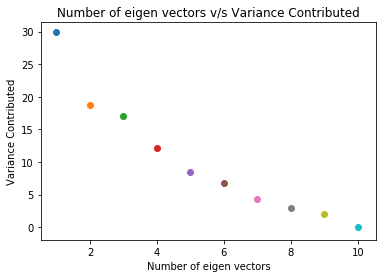

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part


Weight matrix dimension :  (10, 64, 1)
LDA Dimensions :  (1617, 10, 1)


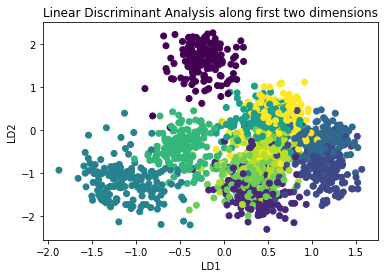

In [88]:
LDA(X_train,Y_train,np.arange(0,10,1))

Binary Classification for classes :  0 1
Eigen values
Eigenvalues 1: 43.522872100451984
Eigenvalues 2: 23.826873153929185
Explained Variance
Eigenvector 1: 165.72986036948006
Eigenvector 2: 90.72986616618503
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (360, 2, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part


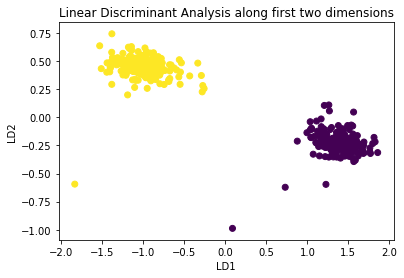

Binary Classification for classes :  0 2
Eigen values
Eigenvalues 1: 57.47626411474962
Eigenvalues 2: 36.906082863702046
Explained Variance
Eigenvector 1: 218.8626983143856
Eigenvector 2: 140.5339230754094
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (355, 2, 1)


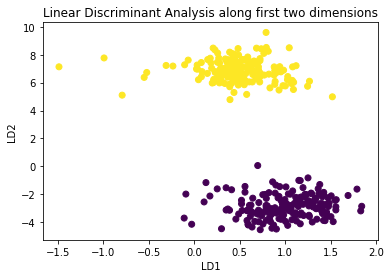

Binary Classification for classes :  0 3
Eigen values
Eigenvalues 1: 58.55352780256474
Eigenvalues 2: 22.594510433815902
Explained Variance
Eigenvector 1: 222.9647888232713
Eigenvector 2: 86.03717720352795
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (361, 2, 1)


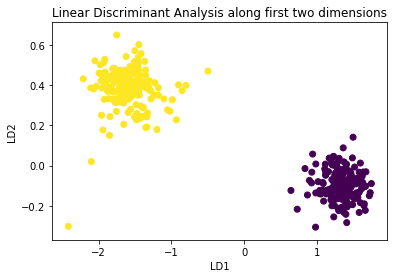

Binary Classification for classes :  0 4
Eigen values
Eigenvalues 1: 58.18077036652333
Eigenvalues 2: 33.31823876289845
Explained Variance
Eigenvector 1: 221.54537335629004
Eigenvector 2: 126.87184442211512
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (359, 2, 1)


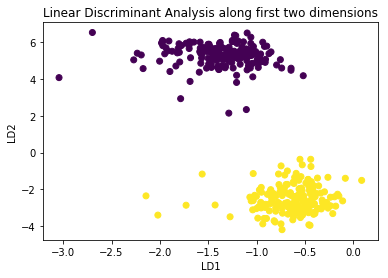

Binary Classification for classes :  0 5
Eigen values
Eigenvalues 1: 55.42984887928347
Eigenvalues 2: 20.486306280850886
Explained Variance
Eigenvector 1: 211.07019531851233
Eigenvector 2: 78.0093894441438
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (360, 2, 1)


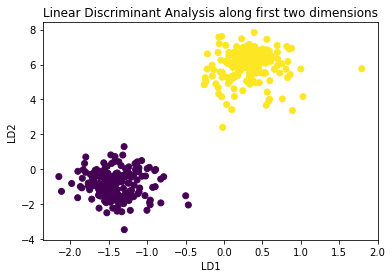

Binary Classification for classes :  0 6
Eigen values
Eigenvalues 1: 228.38653743262077
Eigenvalues 2: 38.91145204772388
Explained Variance
Eigenvector 1: 869.6684555104118
Eigenvector 2: 148.1701276459654
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (359, 2, 1)


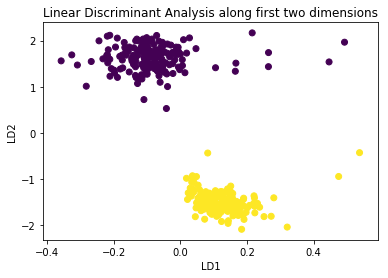

Binary Classification for classes :  0 7
Eigen values
Eigenvalues 1: 77.00660976743224
Eigenvalues 2: 47.23818594431492
Explained Variance
Eigenvector 1: 293.2319047058259
Eigenvector 2: 179.87732846742773
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (357, 2, 1)


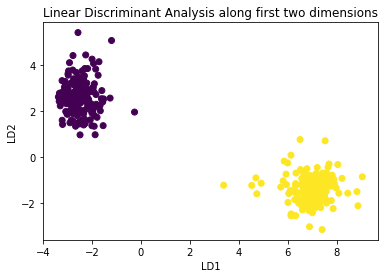

Binary Classification for classes :  0 8
Eigen values
Eigenvalues 1: 66.73984509778579
Eigenvalues 2: 25.56861563245545
Explained Variance
Eigenvector 1: 254.1373001213746
Eigenvector 2: 97.36221196127683
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (352, 2, 1)


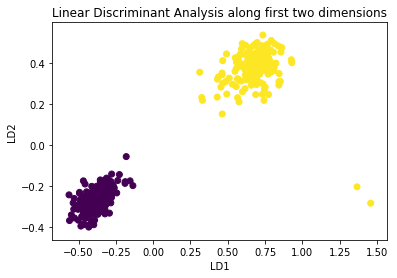

Binary Classification for classes :  0 9
Eigen values
Eigenvalues 1: 49.921703392535534
Eigenvalues 2: 27.419284400456565
Explained Variance
Eigenvector 1: 190.09584003454574
Eigenvector 2: 104.40933596088522
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (358, 2, 1)


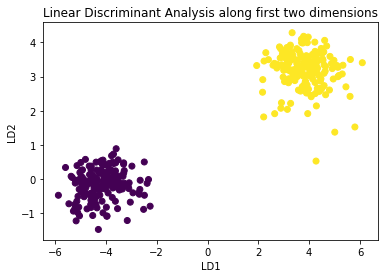

Binary Classification for classes :  1 2
Eigen values
Eigenvalues 1: 41.15290465000673
Eigenvalues 2: 13.80264201885243
Explained Variance
Eigenvector 1: 156.70530946815236
Eigenvector 2: 52.55880010020239
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (359, 2, 1)


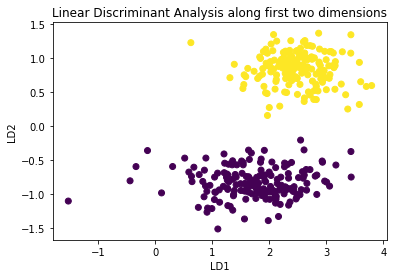

Binary Classification for classes :  1 3
Eigen values
Eigenvalues 1: 31.993604314877416
Eigenvalues 2: 22.521051360593084
Explained Variance
Eigenvector 1: 121.82779582154379
Eigenvector 2: 85.75745389115117
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (365, 2, 1)


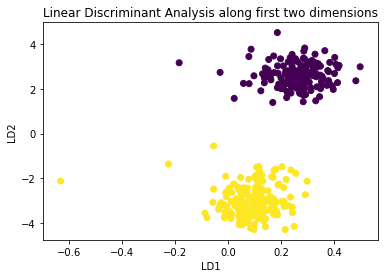

Binary Classification for classes :  1 4
Eigen values
Eigenvalues 1: 74.27512369639338
Eigenvalues 2: 14.816320651215205
Explained Variance
Eigenvector 1: 282.8307343945093
Eigenvector 2: 56.4187663683583
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (363, 2, 1)


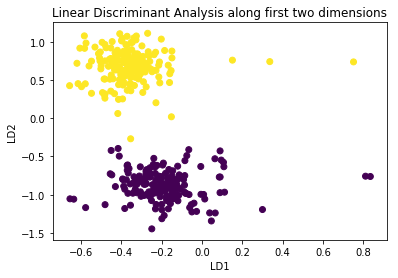

Binary Classification for classes :  1 5
Eigen values
Eigenvalues 1: 22.871521498085116
Eigenvalues 2: 17.109962845570205
Explained Variance
Eigenvector 1: 87.09200200682169
Eigenvector 2: 65.15267987780369
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (364, 2, 1)


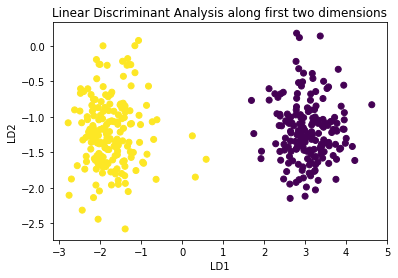

Binary Classification for classes :  1 6
Eigen values
Eigenvalues 1: 145.32712356336017
Eigenvalues 2: 29.978235941588192
Explained Variance
Eigenvector 1: 553.3882010466799
Eigenvector 2: 114.15351554134094
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (363, 2, 1)


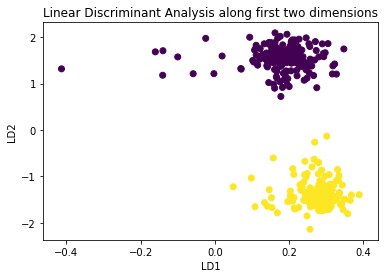

Binary Classification for classes :  1 7
Eigen values
Eigenvalues 1: 38.543485194145966
Eigenvalues 2: 25.840990150787423
Explained Variance
Eigenvector 1: 146.7689541406114
Eigenvector 2: 98.39938135550192
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (361, 2, 1)


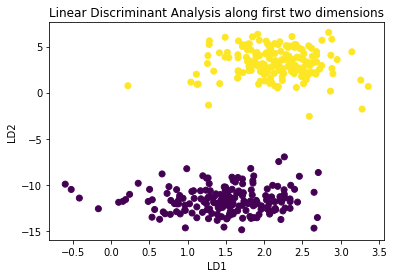

Binary Classification for classes :  1 8
Eigen values
Eigenvalues 1: 27.14526535813099
Eigenvalues 2: 6.213688637757082
Explained Variance
Eigenvector 1: 103.36590441715849
Eigenvector 2: 23.660978713401857
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (356, 2, 1)


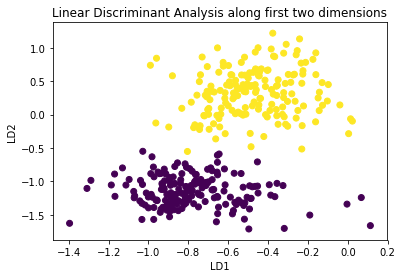

Binary Classification for classes :  1 9
Eigen values
Eigenvalues 1: 19.96365133625386
Eigenvalues 2: 14.394885153518972
Explained Variance
Eigenvector 1: 76.01918229996538
Eigenvector 2: 54.8139906994471
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (362, 2, 1)


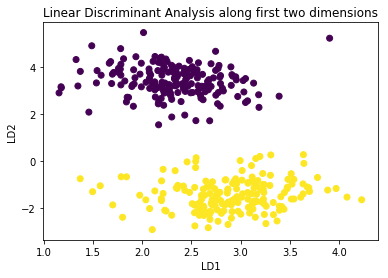

Binary Classification for classes :  2 3
Eigen values
Eigenvalues 1: 76.23288064496742
Eigenvalues 2: 14.882610716954929
Explained Variance
Eigenvector 1: 290.28563730109363
Eigenvector 2: 56.67119096280076
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (360, 2, 1)


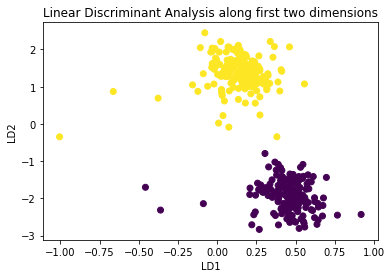

Binary Classification for classes :  2 4
Eigen values
Eigenvalues 1: 56.50034589611446
Eigenvalues 2: 18.0676849954934
Explained Variance
Eigenvector 1: 215.14651915844343
Eigenvector 2: 68.79957059340703
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (358, 2, 1)


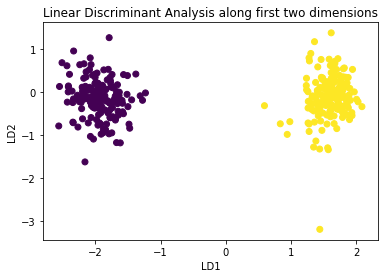

Binary Classification for classes :  2 5
Eigen values
Eigenvalues 1: 31.537581471457806
Eigenvalues 2: 16.44790000402833
Explained Variance
Eigenvector 1: 120.09131570160152
Eigenvector 2: 62.631624235351815
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (359, 2, 1)


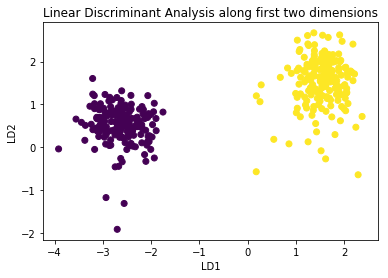

Binary Classification for classes :  2 6
Eigen values
Eigenvalues 1: 59.93262702347453
Eigenvalues 2: 45.67791675840037
Explained Variance
Eigenvector 1: 228.21623272590531
Eigenvector 2: 173.93601113608057
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (358, 2, 1)


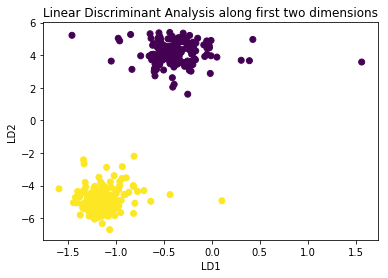

Binary Classification for classes :  2 7
Eigen values
Eigenvalues 1: 47.07430908961338
Eigenvalues 2: 24.418256168785934
Explained Variance
Eigenvector 1: 179.25330512207515
Eigenvector 2: 92.98178153268202
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (356, 2, 1)


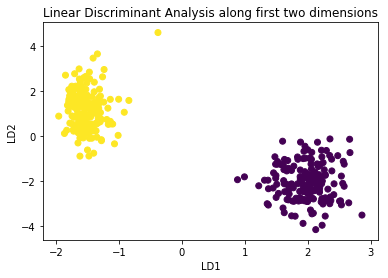

Binary Classification for classes :  2 8
Eigen values
Eigenvalues 1: 78.8102404083941
Eigenvalues 2: 14.270613391362694
Explained Variance
Eigenvector 1: 300.0999131772066
Eigenvector 2: 54.34077878129763
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (351, 2, 1)


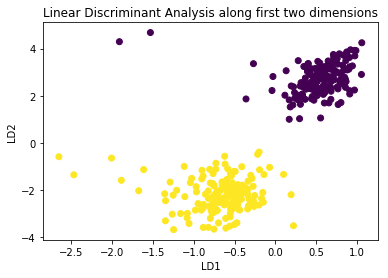

Binary Classification for classes :  2 9
Eigen values
Eigenvalues 1: 51.14321913750034
Eigenvalues 2: 25.020188740590367
Explained Variance
Eigenvector 1: 194.7472250209248
Eigenvector 2: 95.27386834273321
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (357, 2, 1)


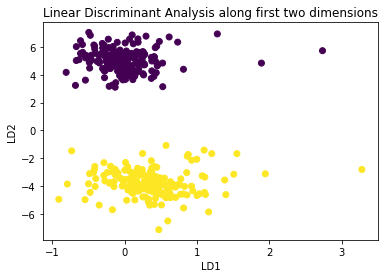

Binary Classification for classes :  3 4
Eigen values
Eigenvalues 1: 44.54446722374587
Eigenvalues 2: 8.256418849761484
Explained Variance
Eigenvector 1: 169.61997168260453
Eigenvector 2: 31.439449583307802
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (364, 2, 1)


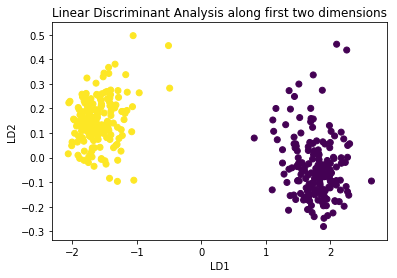

Binary Classification for classes :  3 5
Eigen values
Eigenvalues 1: 29.271453719692314
Eigenvalues 2: 17.13455520978773
Explained Variance
Eigenvector 1: 111.46217387905165
Eigenvector 2: 65.24632464183763
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (365, 2, 1)


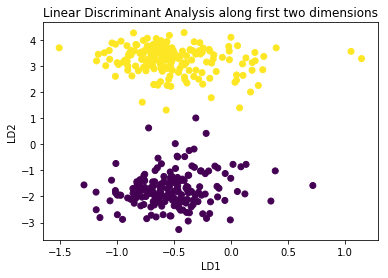

Binary Classification for classes :  3 6
Eigen values
Eigenvalues 1: 51.04881755244851
Eigenvalues 2: 28.662049647798707
Explained Variance
Eigenvector 1: 194.38775514326625
Eigenvector 2: 109.14163649561755
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (364, 2, 1)


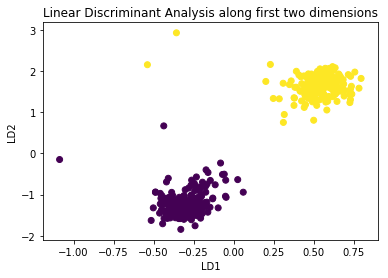

Binary Classification for classes :  3 7
Eigen values
Eigenvalues 1: 34.31952097055235
Eigenvalues 2: 16.00771993791905
Explained Variance
Eigenvector 1: 130.6846065964938
Eigenvector 2: 60.955471505234485
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (362, 2, 1)


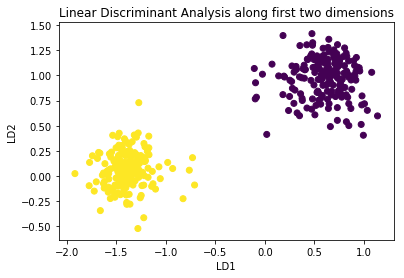

Binary Classification for classes :  3 8
Eigen values
Eigenvalues 1: 29.073605498512514
Eigenvalues 2: 8.972196881488722
Explained Variance
Eigenvector 1: 110.70879165751997
Eigenvector 2: 34.165046207076216
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (357, 2, 1)


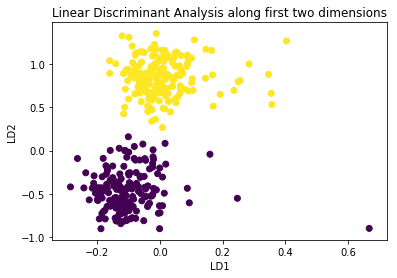

Binary Classification for classes :  3 9
Eigen values
Eigenvalues 1: 48.04842967588444
Eigenvalues 2: 11.904159250263389
Explained Variance
Eigenvector 1: 182.96263911026256
Eigenvector 2: 45.329606139244596
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (363, 2, 1)


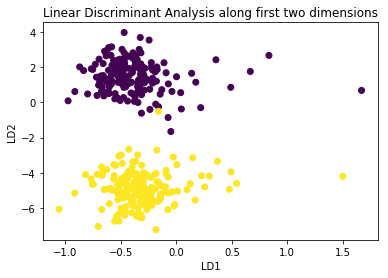

Binary Classification for classes :  4 5
Eigen values
Eigenvalues 1: 36.58331729271046
Eigenvalues 2: 20.850326477587842
Explained Variance
Eigenvector 1: 139.30487061561195
Eigenvector 2: 79.39553455510168
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (363, 2, 1)


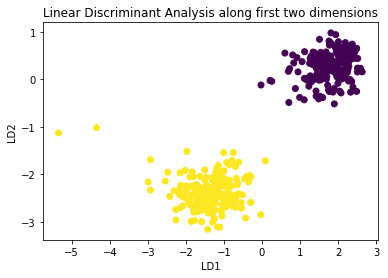

Binary Classification for classes :  4 6
Eigen values
Eigenvalues 1: 106.6207477561974
Eigenvalues 2: 30.7365436039014
Explained Variance
Eigenvector 1: 405.99897905038864
Eigenvector 2: 117.04105988129662
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (362, 2, 1)


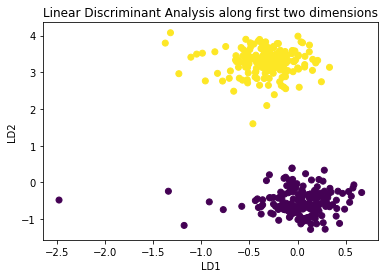

Binary Classification for classes :  4 7
Eigen values
Eigenvalues 1: 1741.3856599928429
Eigenvalues 2: 21.33808929213381
Explained Variance
Eigenvector 1: 6630.987073048234
Eigenvector 2: 81.25287666620028
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (360, 2, 1)


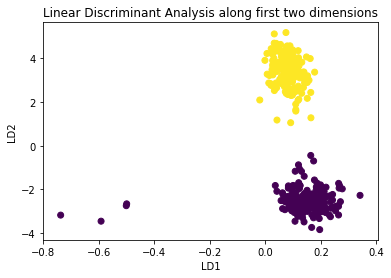

Binary Classification for classes :  4 8
Eigen values
Eigenvalues 1: 71.5735072321224
Eigenvalues 2: 12.550794991213044
Explained Variance
Eigenvector 1: 272.5433039519106
Eigenvector 2: 47.791917238800664
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (355, 2, 1)


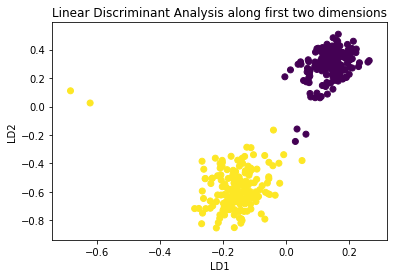

Binary Classification for classes :  4 9
Eigen values
Eigenvalues 1: 31.90292066232889
Eigenvalues 2: 13.483107592474354
Explained Variance
Eigenvector 1: 121.48248338352327
Eigenvector 2: 51.342051450328015
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (361, 2, 1)


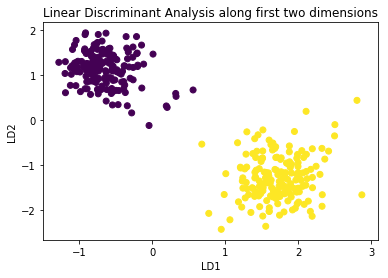

Binary Classification for classes :  5 6
Eigen values
Eigenvalues 1: 69.16293431284723
Eigenvalues 2: 25.88133263693277
Explained Variance
Eigenvector 1: 263.36413231085123
Eigenvector 2: 98.55300068881232
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (363, 2, 1)


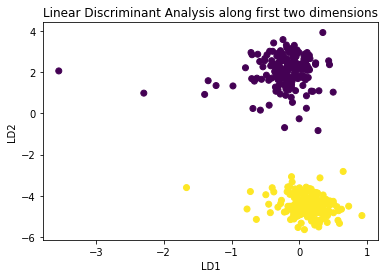

Binary Classification for classes :  5 7
Eigen values
Eigenvalues 1: 40.08840536120055
Eigenvalues 2: 24.306861991213808
Explained Variance
Eigenvector 1: 152.6518242549045
Eigenvector 2: 92.55760590722257
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (361, 2, 1)


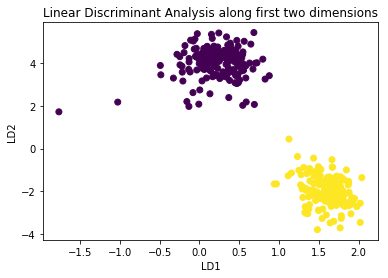

Binary Classification for classes :  5 8
Eigen values
Eigenvalues 1: 45.91433660712998
Eigenvalues 2: 14.586323258137558
Explained Variance
Eigenvector 1: 174.83626947445723
Eigenvector 2: 55.542963968366706
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (356, 2, 1)


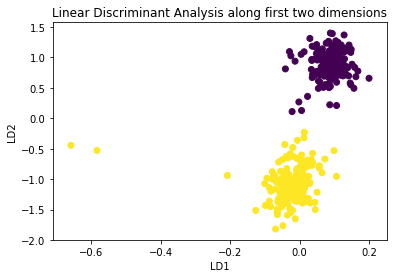

Binary Classification for classes :  5 9
Eigen values
Eigenvalues 1: 27.216392162709205
Eigenvalues 2: 15.15205676444068
Explained Variance
Eigenvector 1: 103.63674673115071
Eigenvector 2: 57.697209092391475
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (362, 2, 1)


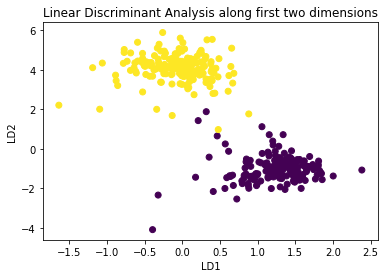

Binary Classification for classes :  6 7
Eigen values
Eigenvalues 1: 75.16463994977184
Eigenvalues 2: 25.604933682633494
Explained Variance
Eigenvector 1: 286.2179052624738
Eigenvector 2: 97.50050672663622
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (360, 2, 1)


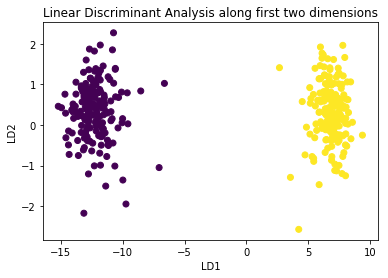

Binary Classification for classes :  6 8
Eigen values
Eigenvalues 1: 36.568193180012805
Eigenvalues 2: 14.126565597645454
Explained Variance
Eigenvector 1: 139.24727981416368
Eigenvector 2: 53.79226211437844
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (355, 2, 1)


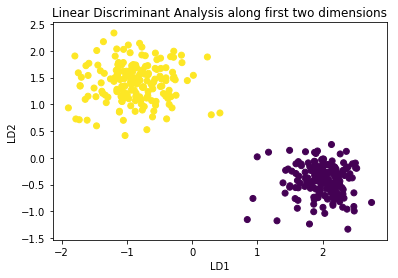

Binary Classification for classes :  6 9
Eigen values
Eigenvalues 1: 59.31105824600079
Eigenvalues 2: 11.003986579119905
Explained Variance
Eigenvector 1: 225.84937360725627
Eigenvector 2: 41.90185691459079
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (361, 2, 1)


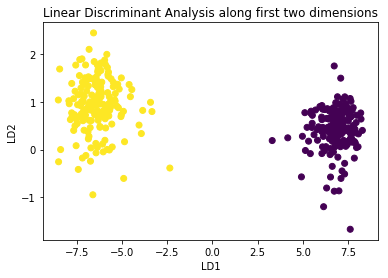

Binary Classification for classes :  7 8
Eigen values
Eigenvalues 1: 71.65456460863663
Eigenvalues 2: 14.029536853665979
Explained Variance
Eigenvector 1: 272.85196068900774
Eigenvector 2: 53.4227883316182
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (353, 2, 1)


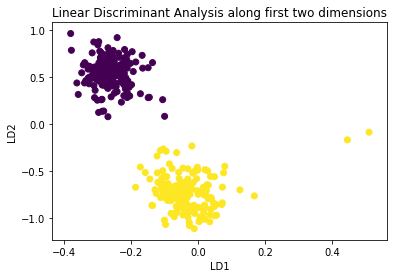

Binary Classification for classes :  7 9
Eigen values
Eigenvalues 1: 29.1419333297235
Eigenvalues 2: 12.335507970411413
Explained Variance
Eigenvector 1: 110.96897581769694
Eigenvector 2: 46.97213016651218
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (359, 2, 1)


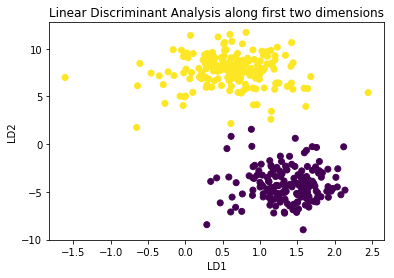

Binary Classification for classes :  8 9
Eigen values
Eigenvalues 1: 27.157339430469648
Eigenvalues 2: 8.873315434239366
Explained Variance
Eigenvector 1: 103.41188103189471
Eigenvector 2: 33.78851755317799
Weight matrix dimension :  (2, 64, 1)
LDA Dimensions :  (354, 2, 1)


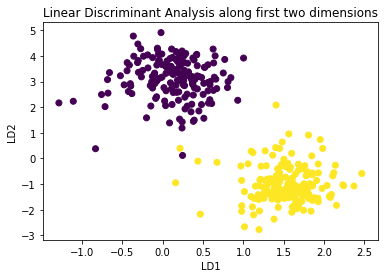

In [84]:
for i in range(num_classes):
  for j in range(i+1,num_classes):
    X_train_new = np.concatenate((X[Y==i],X[Y==j]),axis=0)
    Y_train_new = np.concatenate((Y[Y==i],Y[Y==j]),axis=0)
    print("Binary Classification for classes : " , i , j)
    LDA(X_train_new,Y_train_new,np.array([i,j]))

In [85]:
mean_vector = np.zeros((num_classes,X_train.shape[1]))
for i in range(num_classes):
  mean_vector[i] = np.mean(X_train[Y_train==i],axis=0)

covariance_matrix = np.zeros((num_classes,X_train.shape[1],X_train.shape[1]))
for i in range(num_classes):
  covariance_matrix[i,:,:] = np.cov(X_train[Y_train==i].T)
  
Y_pred = np.zeros((X_test.shape[0],1))
count = 0
for i in range(X_test.shape[0]):
  maxi = 0
  for j in range(num_classes):
    d = - 1/2*np.dot(np.dot(X_test[i] - mean_vector[j], np.linalg.pinv(covariance_matrix[j,:,:])),X_test[i]-mean_vector[j])
    if(j==0):
      Y_pred[i][0] = 0
      maxi = d
    elif(d>maxi):
      Y_pred[i][0] = j
      maxi = d
  if(Y_pred[i][0]==Y_test[i]):
      count+=1
print(count/X_test.shape[0])

0.9388888888888889
